1. 데이터 로딩을 하고 데이터를 시각화나 상관계수를 통해 확인한다. 선형관계를 가지는지 아닌지도 파악하여 어떤 모델이 적합할 지 판단한다. 그 후 이상치나 결측치, 중복치를 처리한 후에 train_test_split 메서드를 통해서 학습용데이터셋, 테스트용 데이터셋을 보통 8:2 비율로 준비한다. 각 데이터의 범위가 너무 크다면 스케일링을 진행한다. 스케일링을 진행한 후 적합한 모델을 선택하고 학습용데이터셋을 통해 모델을 학습시키고 테스트용 데이터셋을 통해 모델의 score을 확인함으로서 최적적합이 잘 이루어졌는지 확인한다.
2. 총 학습용데이터셋, 검증용데이터셋, 테스트용데이터셋로 나누어진다. 학습용데이터셋을 이용하여 모델 학습을 진행하며, 중간에 모델의 성능을 테스트 할때는 검증용 데이터셋이나 테스트용 데이터 셋을 이용한다. 학습용데이터셋과 테스트용 데이터셋을 보통 8:2로 나누고, 나누어진 학습용데이터셋에서 0.1정도의 데이터를 검증용 데이터셋으로 이용한다.
3. 지도학습에서 필요로 하는 것은 데이터와 라벨이다. 모델에게 정답이 무엇인지를 알려주면서 학습시키기 때문에 비지도학습과 다르게 라벨이 필요하다.
4. 이상치,결측치,중복치 제거 혹은 대체 / 각 피쳐의 범위를 확인하고 범위의 차이가 크다면 스케일링 진행 / 피쳐의 수가 너무 적거나 혹은 많거나 피쳐끼리의 상관계수가 높다면 poly 진행하여 피쳐를 만들거나 없애어 수를 조절
5. 모델이란 해당 데이터를 가장 잘 나타내는 수식이다.
6. 회귀모델 학습
7. 모델 파라미터란 모델이 만들어졌을때 자동으로 생기는 모델의 속성들을 말한다. 예를들어 coef_등이 있다.
8. 가장 가까이 있는 K개의 데이터를 보고 새로운 값이 무엇인지를 예측하는 알고리즘이다. 각 데이터와의 거리를 측정하여 가장 가까운 거리에 있는 데이터를 찾는다. 보통 유클리안거리를 사용한다. 따라서 K값은 모델의 성능을 좌우하기 때문에 하이퍼파라미터로 매우 중요하다.  KNN은 분류와 회귀 둘다에서 사용 가능한데 분류는 가장 많이 존재하는 데이터로 추청하고 회귀는 가장 많이 존재하는 데이터의 대표값으로 데이터를 추정한다.
9. 하이퍼파라미터란 모델의 성능을 크게 좌우하는 파라미터이다.
10. RSS,MSE(평균제곱오차),RMSE(루트평균제곱오차),MAE(평균절대값오차),R2(상관계수) 
11. 가장 적합한 선형 수식을 찾아 새로운 값을 예측한다.
12. 정확도(모델이 얼마나 정확하게 예측했는지),정밀도(모델이 참이라고 예측한 것 중에 진짜 참인 비율),재현률( 실제로 참인 것 중에 모델이 참이라고 예측한 비율),F1-SCORE( 정밀도와 재현률의 조화평균) 등
13. 피쳐공학이란 피쳐가 모자라거나 혹은 많을때 피쳐를 줄이거나 늘임으로써 모델의 성능을 높이고자 하는 과정이다.
14. 로지스틱회귀는 주로 이진분류에 쓰인다. 0과 1로 나누어 분류한다.
15. 과대적합이란 학습용 데이터셋에 너무 과하게 학습되어 새로운 데이터에 대한 정확도가 떨어지는 것을 말한다. 이땐, 학습용 데이터셋의 점수가 높고 테스트용 데이터셋의 점수가 낮다. 반대로 과소적합이란 데이터가 너무 적거나 제대로 학습이 이루어지지 않았을때 일어난다. 이땐 학습용 데이터셋의 점수와 테스트용 데이터셋의 점수가 둘다 낮다.
16. 아래

In [240]:
from statistics import LinearRegression

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,LabelEncoder,OneHotEncoder,PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,r2_score,mean_absolute_error,mean_squared_error

ImportError: cannot import name 'LinearRegression' from 'statistics' (C:\Users\kdp\.conda\envs\EXAM_ML\lib\statistics.py)

분류 : 3개 품종 중 2개 선택하여 이진 분류 진행

In [241]:
irisDF = pd.read_csv('../data/iris.csv')
irisDF.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [242]:
irisDF = irisDF[irisDF.variety.isin(['Setosa','Virginica'])]
irisDF['variety'].replace({'Setosa':0, 'Virginica':1}, inplace=True)

In [243]:
# 중복값 결측치 이상치 확인
irisDF.isna().sum(), irisDF.duplicated().sum()

(sepal.length    0
 sepal.width     0
 petal.length    0
 petal.width     0
 variety         0
 dtype: int64,
 1)

In [244]:
targetSR = irisDF[irisDF.columns[-1]]
featureDF = irisDF[irisDF.columns[:-1]]

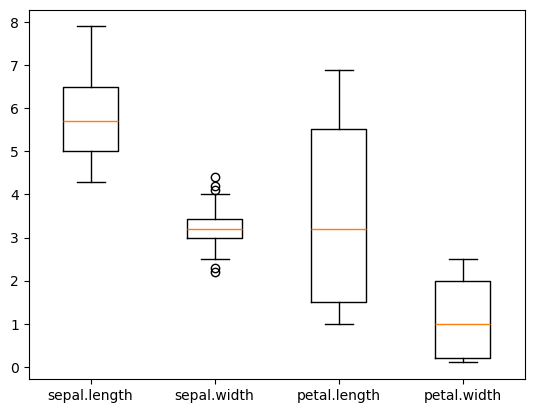

In [245]:
plt.boxplot(featureDF)
plt.xticks(np.arange(1,5), featureDF.columns)
plt.show()

In [246]:
# 이상치 제거 - 시간없어서 제외
z = (featureDF['sepal.width'] - featureDF['sepal.width'].mean()) / featureDF['sepal.width'].std()

In [247]:
xtrain,xtest,ytrain,ytest = train_test_split(featureDF,targetSR,test_size=0.2,random_state=5, stratify=targetSR)

In [248]:
# 스케일링
scaler = MinMaxScaler()
scaler.fit(xtrain)
xtrain = scaler.transform(xtrain)
xtest = scaler.transform(xtest)

In [249]:
# 모델 학습
model = LogisticRegression()
model.fit(xtrain,ytrain)
model.score(xtrain,ytrain),model.score(xtest,ytest)

(1.0, 1.0)

In [250]:
ypre = model.predict(xtest)

In [251]:
pd.DataFrame({'Ypre':ypre,'Y':ytest})

,Ypre,Y
27,0,0
8,0,0
107,1,1
38,0,0
111,1,1
35,0,0
142,1,1
103,1,1
143,1,1
16,0,0


In [252]:
# 모델 평가 성능 지표
pre = precision_score(ypre,ytest)

re = recall_score(ypre,ytest)

r2 = r2_score(ypre,ytest)

f1 = f1_score(ypre,ytest)

print(f'정밀도 : {pre}\n재현율 : {re}\nr2 : {r2}\nf1 : {f1}')

정밀도 : 1.0
재현율 : 1.0
r2 : 1.0
f1 : 1.0


In [253]:
xtest

array([[0.25      , 0.59090909, 0.08474576, 0.04166667],
       [0.02777778, 0.31818182, 0.06779661, 0.04166667],
       [0.83333333, 0.31818182, 0.89830508, 0.70833333],
       [0.02777778, 0.36363636, 0.05084746, 0.04166667],
       [0.58333333, 0.22727273, 0.72881356, 0.75      ],
       [0.19444444, 0.45454545, 0.03389831, 0.04166667],
       [0.41666667, 0.22727273, 0.69491525, 0.75      ],
       [0.55555556, 0.31818182, 0.77966102, 0.70833333],
       [0.69444444, 0.45454545, 0.83050847, 0.91666667],
       [0.30555556, 0.77272727, 0.05084746, 0.125     ],
       [0.55555556, 0.54545455, 0.77966102, 0.95833333],
       [0.66666667, 0.36363636, 0.71186441, 0.91666667],
       [0.33333333, 0.59090909, 0.05084746, 0.04166667],
       [0.66666667, 0.5       , 0.79661017, 1.        ],
       [0.41666667, 0.22727273, 0.69491525, 0.75      ],
       [0.22222222, 0.54545455, 0.08474576, 0.04166667],
       [0.86111111, 0.27272727, 0.86440678, 0.75      ],
       [0.16666667, 0.40909091,

In [254]:
newdata = [[5.0,3.0,1.0,0.2]]
model.predict(newdata), model.predict_proba(newdata)
# 1 : Virginica

(array([1], dtype=int64), array([[0.00654414, 0.99345586]]))

회귀 : 3개 품종 중 1개 선택하여, 4개 피쳐 중 꽃잎의 길이값 예측 회귀

In [255]:
irisDF = pd.read_csv('../data/iris.csv')
irisDF.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [256]:
irisDF = irisDF[irisDF.variety == 'Setosa']
irisDF.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [257]:
irisDF.corr(numeric_only=True)['petal.length'].sort_values(ascending = False)

petal.length    1.000000
petal.width     0.331630
sepal.length    0.267176
sepal.width     0.177700
Name: petal.length, dtype: float64

In [258]:
targetSR = irisDF['petal.length']
featureDF = irisDF[irisDF.columns[:3]]

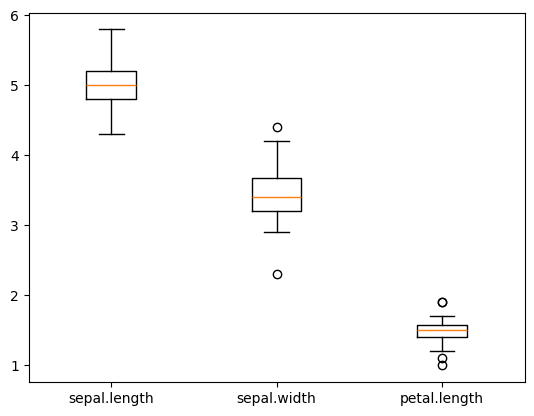

In [259]:
plt.boxplot(featureDF)
plt.xticks(np.arange(1,4), featureDF.columns)
plt.show()  # 스케일링은 생략

In [260]:
xtrain,xtest,ytrain,ytest = train_test_split(featureDF,targetSR,test_size=0.2,random_state=5)

In [261]:
from sklearn.linear_model import LinearRegression

In [262]:
model = LinearRegression()
model.fit(xtrain,ytrain)
model.score(xtrain,ytrain),model.score(xtest,ytest)

(1.0, 1.0)

In [263]:
# 모델 성능 평가
ypre = model.predict(xtest)
mse = mean_squared_error(ytest,ypre)
mae = mean_absolute_error(ytest,ypre)
rmse = mean_squared_error(ytest,ypre, squared=False)
r2 = model.score(xtest,ytest)
print(f'mse : {mse}\nmae : {mae}\nrmse : {rmse}\nr2 : {r2}')

mse : 9.860761315262648e-33
mae : 4.4408920985006264e-17
rmse : 9.930136612989092e-17
r2 : 1.0


In [264]:
newdata = [[4.1,3.3,1.4]]

model.predict(newdata)
# 꽃잎의 길이를 1.4라고 예츢

C:\Users\kdp\.conda\envs\EXAM_ML\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.4])